In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
# see bottom of notebook for compact code to export a processed dataframe used in tableau visualisations

In [40]:
df = pd.read_csv('/Users/chelsealiu/Desktop/*RMA/Ipsos/Topic Visualisation - Imperial X Ipsos.csv')
print("Number of entries: ", df.shape[0])
df.head()

Number of entries:  1271917


,id,label,wikiLink,score,wikidataId,page_url,clean_url
0,7,Rail transport,http://en.wikipedia.org/Category:Rail_transport,1.0000,Q3565868,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...
1,15,Sustainable transport,http://en.wikipedia.org/Category:Sustainable_t...,0.9209,Q1364310,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...
2,21,M7 motorway (Ireland),http://en.wikipedia.org/M7_motorway_(Ireland),0.6578,Q3775884,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...
3,28,Vehicles,http://en.wikipedia.org/Category:Vehicles,0.5624,Q42889,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...
4,38,Passenger rail transport,http://en.wikipedia.org/Category:Passenger_rai...,0.5064,Q1433891,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...


### EDA

In [25]:
df = pd.read_csv('/Users/chelsealiu/Desktop/*RMA/Ipsos/Topic Visualisation - Imperial X Ipsos.csv')

df['news_source'] = df['clean_url'].apply(lambda x: x.split('/')[0])
df['processed_url'] = df['clean_url'].apply(lambda x: (x.split('?')[0]).split('&')[0]) # get rid of some webpage parameters (e.g., utm, fbclid, ...)
df['page_type'] = df['clean_url'].apply(lambda x: x.split('/')[1] if len(x.split('/')) > 2 else None)

bin_edges = [i / 10.0 for i in range(11)]
bin_labels = [f'({i/10}-{(i+1)/10})' for i in range(10)]
df['score_bins'] = pd.cut(df['score'], bins=bin_edges, labels=bin_labels, include_lowest=True)

df['rounded_score'] = df['score'].apply(lambda x: math.ceil(x * 10) / 10)

df['clicks'] = df['clean_url'].str.count('/')
df['clean_news_source'] = df['news_source'].str.replace('.co.uk', '').str.replace('.com', '').str.replace('.ie', '')

print("Number of entries: ", df.shape[0])

Number of entries:  1271917


In [32]:
df.head()

,id,label,wikiLink,score,wikidataId,page_url,clean_url,news_source,processed_url,page_type,score_bins,rounded_score,clicks,clean_news_source
0,7,Rail transport,http://en.wikipedia.org/Category:Rail_transport,1.0000,Q3565868,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.9-1.0),1.0,2,dublinlive
1,15,Sustainable transport,http://en.wikipedia.org/Category:Sustainable_t...,0.9209,Q1364310,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.9-1.0),1.0,2,dublinlive
2,21,M7 motorway (Ireland),http://en.wikipedia.org/M7_motorway_(Ireland),0.6578,Q3775884,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.6-0.7),0.7,2,dublinlive
3,28,Vehicles,http://en.wikipedia.org/Category:Vehicles,0.5624,Q42889,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.5-0.6),0.6,2,dublinlive
4,38,Passenger rail transport,http://en.wikipedia.org/Category:Passenger_rai...,0.5064,Q1433891,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.5-0.6),0.6,2,dublinlive


In [3]:
print("Number of differnt labels (potential topics) : ", df['label'].nunique())
print("Number of unique news: ", df['clean_url'].nunique()) # this is not correct because some urls are linked to the same webpage

Number of differnt labels (potential topics) :  53255
Number of unique news:  6724


In [16]:
df['news_source'] = df['clean_url'].apply(lambda x: x.split('/')[0])
print("Number of unique news source: ", df['news_source'].nunique())

Number of unique news source:  105


In [17]:
df['processed_url'] = df['clean_url'].apply(lambda x: (x.split('?')[0]).split('&')[0]) # get rid of some webpage parameters (e.g., utm, fbclid, ...)

In [7]:
print("Number of unique news: ", df['processed_url'].nunique())
print("Number of unique news source: ", df['news_source'].nunique())
df['news_source'].unique()

Number of unique news:  4741
Number of unique news source:  105


array(['dublinlive.ie', 'driving.co.uk', 'bedfordshirelive.co.uk',
       'insider.co.uk', 'football.london', 'buckinghamshirelive.com',
       'getreading.co.uk', 'store.thetimes.ie', 'virginradio.co.uk',
       'mytimesplus.co.uk', 'hampshirelive.news', 'carmagazine.co.uk',
       'cheshire-live.co.uk', 'corkbeo.ie', 'rsvplive.ie', 'teamtalk.com',
       'staffordshire-live.co.uk', 'buzz.ie', 'takeabreak.co.uk',
       'sportswomenoftheyear.co.uk', 'sussexlive.co.uk',
       'hertfordshiremercury.co.uk', 'fm104.ie', 'huffingtonpost.co.uk',
       'lincolnshirelive.co.uk', 'cityam.com', 'empireonline.com',
       'stylist.co.uk', 'tvchoicemagazine.co.uk', 'business-live.co.uk',
       'thecourier.co.uk', 'liverpool.com', 'sundaypost.com',
       'ukholidaysinthesun.co.uk', 'bellamagazine.co.uk',
       'pressandjournal.co.uk', 'yours.co.uk', 'heatworld.com',
       'i2-prod.football.london', 'todays-golfer.com', 'huffpost.com',
       'm.huffpost.com', 'live95fm.ie', 'graziadaily.co.u

In [7]:
print(f'Only around {100*round(df[df.score >= 0.5].shape[0] / df.shape[0], 3)}% entries are more related to the topics.') # depends on which is the threshold we set

Only around 11.5% entries are more related to the topics.


In [18]:
df['page_type'] = df['clean_url'].apply(lambda x: x.split('/')[1] if len(x.split('/')) > 2 else None)

In [9]:
print(df['page_type'].nunique()) # the navigation bar categories -> general categories
# df['page_type'].unique()

125


array(['news', 'whats-on', 'lifestyle', 'all-about', 'special-reports',
       None, 'schedules', 'entertainment', 'music', 'events', 'offers',
       'competitions', 'car-reviews', 'electric', 'hybrid', 'car-news',
       'features', 'authors', 'incoming', 'culture', 'life', 'style',
       'tottenham-hotspur', 'special-features', 'tv', 'celebrity',
       'entry', 'movies', 'beauty', 'economic-development', '2023', 'amp',
       'long-reads', '', 'online-puzzles', 'category', 'fp',
       'retail-consumer', 'news-and-events', 'health', 'people',
       'relationships', 'gaming', 'money', 'giveaways', 'series',
       'us-sport', 'search', 'c', 'fashion', 'beauty-hair', '2014',
       'chelsea-fc', 'food-drink', 'real-life', 'win', 'equipment',
       'read', 'west-wing', 'life-style', 'shows', 'library',
       'technology', 'home', 'info', 'latest-news', 'fitness-health',
       'liverpool-fc-news', 'enterprise', 'car-clinic', 'opinion', 'tag',
       'tottenham-hotspur-fc', 'email'

In [10]:
df.groupby('processed_url')['label'].nunique().sort_values(ascending=False).head() # how many entries per url/ weight of pages relative to whole data

processed_url
empireonline.com/movies/features/best-movies-2                                                                     752
driving.co.uk/news/new-cars/current-upcoming-pure-electric-car-guide-updated                                       643
empireonline.com/movies/features/best-sci-fi-movies                                                                634
empireonline.com/movies/features/best-teen-movies                                                                  600
huffingtonpost.co.uk/entry/richard-hanania-white-supremacist-pseudonym-richard-hoste_n_64c93928e4b021e2f295e817    565
Name: label, dtype: int64

In [12]:
df.groupby('label')['processed_url'].nunique().sort_values(ascending=False)

label
Public sphere                                   4016
Culture                                         3973
Mass media                                      3875
Technology                                      3623
Human communication                             3620
                                                ... 
Northern Ireland B international footballers       1
Ecological experiments                             1
Ecology of the Himalayas                           1
Econet                                             1
'Salem's Lot                                       1
Name: processed_url, Length: 53255, dtype: int64

In [13]:
df.groupby(['news_source', 'label'])['processed_url'].nunique().sort_values(ascending=False)

news_source    label                                          
ok.co.uk       Culture                                            699
               Entertainment                                      696
               Mass media                                         682
               Public sphere                                      679
               The arts                                           659
                                                                 ... 
heatworld.com  Pastries                                             1
               Pasteurized fermented foods                          1
               Partner dance                                        1
               Participants in Irish reality television series      1
yours.co.uk    radio programme debuts                               1
Name: processed_url, Length: 177475, dtype: int64

In [6]:
df[df.score >= 0.5].groupby(['news_source', 'label'])['processed_url'].nunique().sort_values(ascending=False)

news_source         label                 
ok.co.uk            Entertainment             365
                    Mass media                347
thecourier.co.uk    Facebook                  335
                    LinkedIn                  318
                    Technology                259
                                             ... 
hampshirelive.news  Neurology                   1
                    Neurological disorders      1
                    Neurological disorder       1
                    Network Rail                1
yours.co.uk         Wrap dress                  1
Name: processed_url, Length: 37794, dtype: int64

In [19]:
bin_edges = [i / 10.0 for i in range(11)]
bin_labels = [f'({i/10}-{(i+1)/10})' for i in range(10)]
df['score_bins'] = pd.cut(df['score'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df.head()

,id,label,wikiLink,score,wikidataId,page_url,clean_url,news_source,processed_url,page_type,score_bins
0,7,Rail transport,http://en.wikipedia.org/Category:Rail_transport,1.0000,Q3565868,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.9-1.0)
1,15,Sustainable transport,http://en.wikipedia.org/Category:Sustainable_t...,0.9209,Q1364310,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.9-1.0)
2,21,M7 motorway (Ireland),http://en.wikipedia.org/M7_motorway_(Ireland),0.6578,Q3775884,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.6-0.7)
3,28,Vehicles,http://en.wikipedia.org/Category:Vehicles,0.5624,Q42889,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.5-0.6)
4,38,Passenger rail transport,http://en.wikipedia.org/Category:Passenger_rai...,0.5064,Q1433891,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.5-0.6)
5,42,Transport law,http://en.wikipedia.org/Category:Transport_law,0.4119,Q1996243,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.4-0.5)
6,53,Rail transport operations,http://en.wikipedia.org/Category:Rail_transpor...,0.2792,Q769493,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.2-0.3)
7,63,Street furniture,http://en.wikipedia.org/Category:Street_furniture,0.2264,Q13397636,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.2-0.3)
8,64,Issues in ethics,http://en.wikipedia.org/Category:Issues_in_ethics,0.2249,Q9465,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.2-0.3)
9,65,Road junction types,http://en.wikipedia.org/Category:Road_junction...,0.2237,Q2376564,https://www.dublinlive.ie/news/dublin-traffic-...,dublinlive.ie/news/dublin-traffic-live-crash-n...,dublinlive.ie,dublinlive.ie/news/dublin-traffic-live-crash-n...,news,(0.2-0.3)


## Basic charts

### Distribution of scores

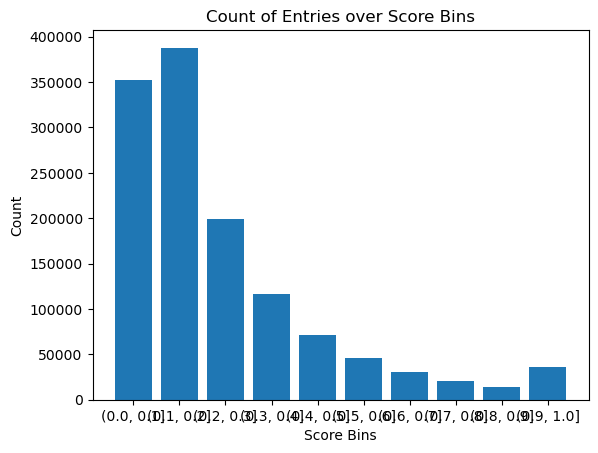

In [15]:
# distribution of entries over score -> matplotlib, see version2 instead

# create 10 bins for the score
bins = [i/10 for i in range(11)]

# Group the entries into the bins and count them
count_per_bin = df['score'].groupby(pd.cut(df['score'], bins)).count()

# Plotting the bar chart
plt.bar(count_per_bin.index.astype(str), count_per_bin.values)
plt.xlabel('Score Bins')
plt.ylabel('Count')
plt.title('Count of Entries over Score Bins')
plt.show()


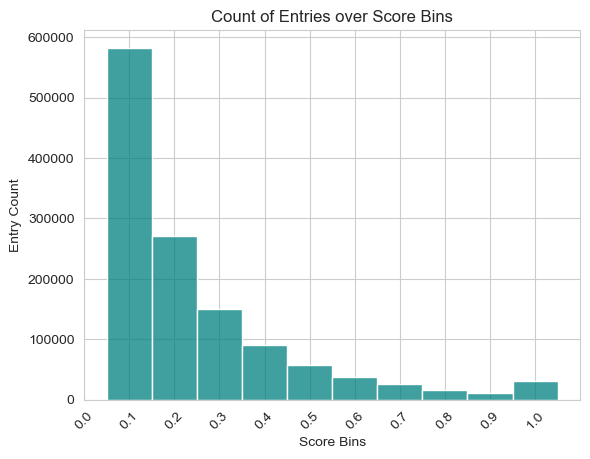

In [12]:
# distribution of entries over score
sns.set_style("whitegrid")

ax = sns.histplot(data=df, x='score', bins=10, kde=False, color = 'teal', binwidth = 0.1)

plt.xticks([i/10 for i in range(11)], labels=[f'{i/10:.1f}' for i in range(11)], rotation=45)
plt.xlabel('Score Bins')
plt.ylabel('Entry Count')
plt.title('Count of Entries over Score Bins')
plt.show()

### News source

In [33]:
df['news_source'] = df['clean_url'].apply(lambda x: x.split('/')[0])
print(df['news_source'].nunique())
df['news_source'].unique()

105


array(['dublinlive.ie', 'driving.co.uk', 'bedfordshirelive.co.uk',
       'insider.co.uk', 'football.london', 'buckinghamshirelive.com',
       'getreading.co.uk', 'store.thetimes.ie', 'virginradio.co.uk',
       'mytimesplus.co.uk', 'hampshirelive.news', 'carmagazine.co.uk',
       'cheshire-live.co.uk', 'corkbeo.ie', 'rsvplive.ie', 'teamtalk.com',
       'staffordshire-live.co.uk', 'buzz.ie', 'takeabreak.co.uk',
       'sportswomenoftheyear.co.uk', 'sussexlive.co.uk',
       'hertfordshiremercury.co.uk', 'fm104.ie', 'huffingtonpost.co.uk',
       'lincolnshirelive.co.uk', 'cityam.com', 'empireonline.com',
       'stylist.co.uk', 'tvchoicemagazine.co.uk', 'business-live.co.uk',
       'thecourier.co.uk', 'liverpool.com', 'sundaypost.com',
       'ukholidaysinthesun.co.uk', 'bellamagazine.co.uk',
       'pressandjournal.co.uk', 'yours.co.uk', 'heatworld.com',
       'i2-prod.football.london', 'todays-golfer.com', 'huffpost.com',
       'm.huffpost.com', 'live95fm.ie', 'graziadaily.co.u

In [34]:
# clean domain
# Remove instances of '.co.uk' and '.com' from 'news_source'
df['clean_news_source'] = df['news_source'].str.replace('.co.uk', '').str.replace('.com', '').str.replace('.ie', '')

# Display unique values and count after cleaning
print(df['clean_news_source'].nunique())
print(df['clean_news_source'].unique())
# lost one

103
['dublinlive' 'driving' 'bedfordshirelive' 'insider' 'football.london'
 'buckinghamshirelive' 'getreading' 'store.thetimes' 'virginradio'
 'mytimesplus' 'hampshirelive.news' 'carmagazine' 'cheshire-live'
 'corkbeo' 'rsvplive' 'teamtalk' 'staffordshire-live' 'buzz' 'takeabreak'
 'sportswomenoftheyear' 'sussexlive' 'hertfordshiremercury' 'fm104'
 'huffingtonpost' 'lincolnshirelive' 'cityam' 'empireonline' 'stylist'
 'tvchoicemagazine' 'business-live' 'thecourier' 'liverpool' 'sundaypost'
 'ukholidaysinthesun' 'bellamagazine' 'pressandjournal' 'yours'
 'heatworld' 'i2-prod.football.london' 'todays-golfer' 'huffpost'
 'm.huffpost' 'live95fm' 'graziadaily' 'm.lincolnshirelive'
 'directory.hertfordshiremercury' 'dreamteamfc' 'thatslife' 'news'
 'members.graziadaily' 'closeronline' 'northantslive.news'
 'timesradio.wireless.radio' 'i2-prod.liverpool' 'members.empireonline'
 'thesunvegas' 'embeds.stylist' 'i2-prod.getreading'
 'i2-prod.cheshire-live' 'u105' 'radio.virginradio' 'm.huffingto

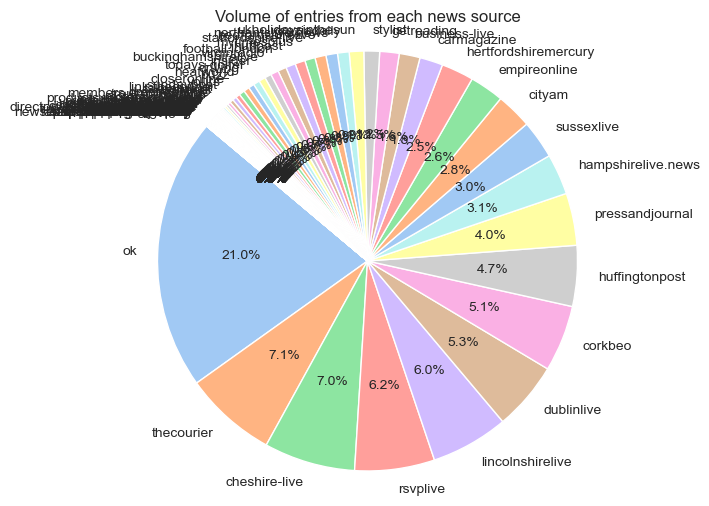

In [42]:
# page_type proportions
news_source_proportions = df['clean_news_source'].value_counts(normalize=True)

# plot pie chart
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
plt.pie(news_source_proportions, labels=news_source_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Volume of entries from each news source')
plt.axis('equal')
plt.show()

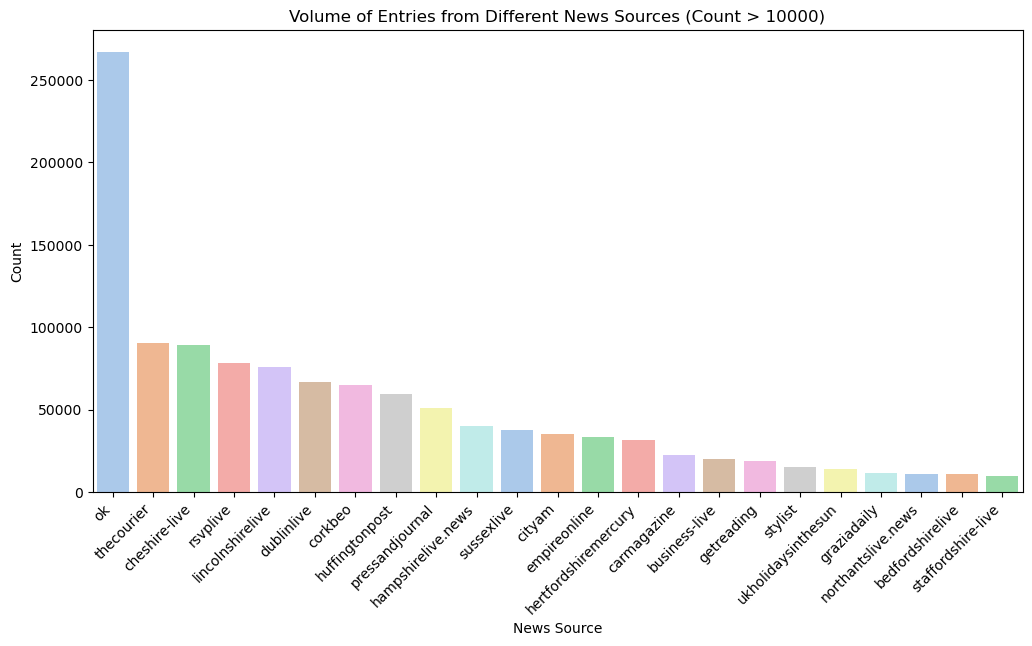

In [27]:
# include only news sources with a count higher than 10,000
filtered_df = df['clean_news_source'].value_counts()[df['clean_news_source'].value_counts() > 10000]

# plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['clean_news_source'].isin(filtered_df.index)], 
              x='clean_news_source', 
              palette='pastel', 
              order=filtered_df.index)
plt.title('Volume of Entries from Different News Sources (Count > 10000)')
plt.xlabel('News Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [30]:
# filter for fp
fp_entries = df[df['page_type'] == 'fp']
fp_entries.head(10) 
# demonstrates limitations of 'categories'
# different webpages design their pages differently, with topics embedded at different levels of the webpage

,id,label,wikiLink,score,wikidataId,page_url,clean_url,news_source,processed_url,page_type,num_slashes
40375,3,Facebook,http://en.wikipedia.org/Facebook,0.8745,Q355,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40376,7,Food and drink,http://en.wikipedia.org/Category:Food_and_drink,0.7458,Q5645580,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40377,10,Supermarket,http://en.wikipedia.org/Supermarket,0.5906,Q180846,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40378,19,Industries (economics),http://en.wikipedia.org/Category:Industries_(e...,0.5065,Q268592,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40379,39,China,http://en.wikipedia.org/China,0.4052,Q148,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40380,56,Hamburger button,http://en.wikipedia.org/Hamburger_button,0.3291,Q21306238,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40381,60,Crops originating from Peru,http://en.wikipedia.org/Category:Crops_origina...,0.3022,Q8430166,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40382,62,Staple foods,http://en.wikipedia.org/Category:Staple_foods,0.3017,Q736427,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40383,66,Private sector,http://en.wikipedia.org/Category:Private_sector,0.2891,Q591763,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5
40384,70,European cuisine,http://en.wikipedia.org/Category:European_cuisine,0.2855,Q579316,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk/fp/business/farming/8287...,pressandjournal.co.uk,pressandjournal.co.uk/fp/business/farming/8287...,fp,5


### labels

In [5]:
filtered_labels = df[df['score'] >= 0.5]['label']
filtered_labels

0                        Rail transport
1                 Sustainable transport
2                 M7 motorway (Ireland)
3                              Vehicles
4              Passenger rail transport
                       ...             
1271899                    Pneumothorax
1271900    Human diseases and disorders
1271901                        Medicine
1271902                         Surgery
1271903                Causes of events
Name: label, Length: 146109, dtype: object

### number of clicks

In [42]:
# Count the number of forward slashes in 'clean_url' and create a new column 'clicks'
df['clicks'] = df['clean_url'].str.count('/')
print(df['clicks'].unique())


[2 3 4 1 0 5 6 7]


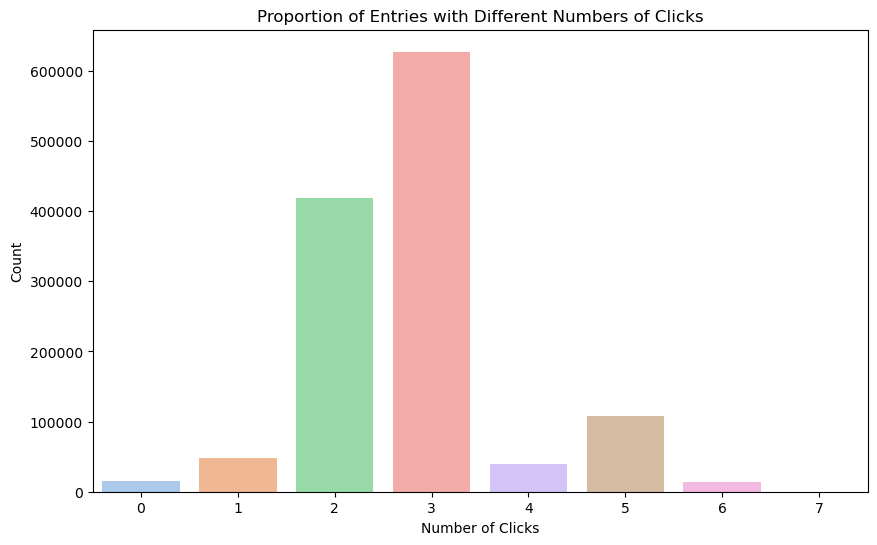

In [43]:
# plot count of entries with different numbers of clicks
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='clicks', palette='pastel')
plt.title('Proportion of Entries with Different Numbers of Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Count')
plt.show()


In [ ]:
# compact code to export the processed dataframe for making visualisations in Tableau
df = pd.read_csv('/Users/chelsealiu/Desktop/*RMA/Ipsos/Topic Visualisation - Imperial X Ipsos.csv')
df['news_source'] = df['clean_url'].apply(lambda x: x.split('/')[0])
df['processed_url'] = df['clean_url'].apply(lambda x: (x.split('?')[0]).split('&')[0]) # get rid of some webpage parameters (e.g., utm, fbclid, ...)
df['page_type'] = df['clean_url'].apply(lambda x: x.split('/')[1] if len(x.split('/')) > 2 else None)

bin_edges = [i / 10.0 for i in range(11)]
bin_labels = [f'({i/10}-{(i+1)/10})' for i in range(10)]
df['score_bins'] = pd.cut(df['score'], bins=bin_edges, labels=bin_labels, include_lowest=True)

df['rounded_score'] = df['score'].apply(lambda x: math.ceil(x * 10) / 10)

df['clicks'] = df['clean_url'].str.count('/')
df['clean_news_source'] = df['news_source'].str.replace('.co.uk', '').str.replace('.com', '').str.replace('.ie', '')

# export processed data to tableau
df.to_csv('/Users/chelsealiu/Desktop/*RMA/Ipsos/ipsos_processed.csv', index=False)